This notebook contains all the exploration steps taken during the **Adjust Data Exercise**, which are listed as follows:<br>
1) Preliminary Exploration<br>
2) Variable Inspection - free_download<br>
3) Variable Inspection - release_date<br>
4) Variable Impacts on the Rankings - free_download<br>
5) Variable Impacts on the Rankings - release_year<br>
6) Prediction - rank

# 1. Preliminary Exploration

1) Loading the dataset into panda dataframes

In [1]:
import pandas as pd

In [2]:
ranks = pd.read_csv('itunes_application_ranks.csv')
itn_app = pd.read_csv('itunes_applications.csv')

2) Taking a first look at the dataset

In [3]:
ranks.head()

,created_at,application_id,rank
0,2016-01-01,479516143,1
1,2016-01-01,490217893,2
2,2016-01-01,868692227,3
3,2016-01-01,1044677336,4
4,2016-01-01,984732818,5


In [4]:
itn_app.head()

,id,title,free_download,release_date
0,785638228,Mixgram - Picture Collage Maker - Pic Photo Ed...,t,2014-05-06
1,586910133,Smart Alarm Clock : sleep cycle & snoring reco...,t,2013-05-18
2,1030815031,Discovery VR,t,2015-08-27
3,1183153380,SS SSR Client,f,2016-12-09
4,1132443199,超特訓！トミックゲーム！！,t,2016-10-17


In [5]:
itn_app.shape

(11100, 4)

In [6]:
ranks.shape

(366000, 3)

Now we check if there are any columns that contain missing data?

In [7]:
for col in itn_app.columns:
    print col+': '+str(itn_app[col].isnull().sum())


id: 0
title: 0
free_download: 0
release_date: 0


In [8]:
for col in ranks.columns:
    print col+': '+str(ranks[col].isnull().sum())


created_at: 0
application_id: 0
rank: 0


Now we know for certain that there are no missing values in the dataset.

In [9]:
itn_app.free_download.unique()

array(['t', 'f'], dtype=object)

In [10]:
len(ranks.application_id.unique())

11100

In [11]:
len(itn_app.id.unique())

11100

In [12]:
len(ranks.created_at.unique())

366

In [13]:
ranks['rank'].describe()

count    366000.000000
mean        500.500000
std         288.675385
min           1.000000
25%         250.750000
50%         500.500000
75%         750.250000
max        1000.000000
Name: rank, dtype: float64

3) After the first look, we know that we have now some simple information about 11100 applications (id, application title, whether the download is free or not and the release date), and the top 1000 applications on a daily basis for the year of 2016.

# 2. Variable Inspection - free_download

1) Now we take a closer look at the individual columns, starting from column 'free_download'. The following bar chart shows that 62.3% of the applications in the sample set are free for download.

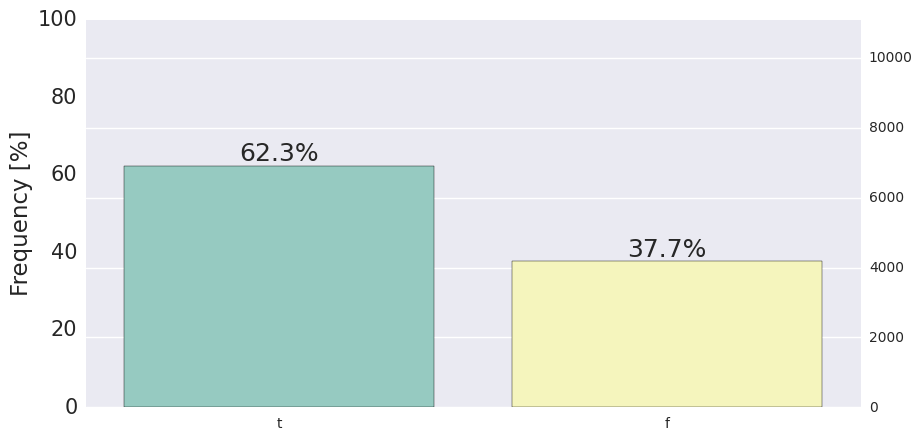

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


def add_freq(data):
    ncount = len(data)

    ax2=ax.twinx()

    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')

    ax2.set_ylabel('Frequency [%]')

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom')

    ax2.set_ylim(0,100)
    ax2.grid(None)

ax = sns.countplot(x = itn_app.free_download ,palette="Set3")
sns.set(font_scale=1.5)
ax.set_ylim(top = itn_app.shape[0])
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_ylim(top=itn_app.shape[0])

add_freq(itn_app)

plt.show()

# 3. Variable Inspection - release_date

1) To investigate the column release_date, we look at the time span first (from 2008-07-11 to 2016-12-28),

In [15]:
itn_app.release_date.min()

'2008-07-11'

In [16]:
itn_app.release_date.max()

'2016-12-28'

Afterwards, we create one more column to mark the month and the year of the release, in order to better track the trend of application release.

In [17]:
from datetime import datetime

In [18]:
itn_app['release_month'] = itn_app.release_date.apply(lambda x: x.rsplit('-', 1)[0])
itn_app['release_year'] = itn_app.release_date.apply(lambda x: x.split('-', 1)[0])

In [19]:
itn_app.head()

,id,title,free_download,release_date,release_month,release_year
0,785638228,Mixgram - Picture Collage Maker - Pic Photo Ed...,t,2014-05-06,2014-05,2014
1,586910133,Smart Alarm Clock : sleep cycle & snoring reco...,t,2013-05-18,2013-05,2013
2,1030815031,Discovery VR,t,2015-08-27,2015-08,2015
3,1183153380,SS SSR Client,f,2016-12-09,2016-12,2016
4,1132443199,超特訓！トミックゲーム！！,t,2016-10-17,2016-10,2016


2) We do aggregation based on release_month and visualize the clear uptrend with a line plot:

In [20]:
count_by_month = itn_app.groupby(['release_month']).agg({'id':'count'})

In [21]:
count_by_month = count_by_month.reset_index()

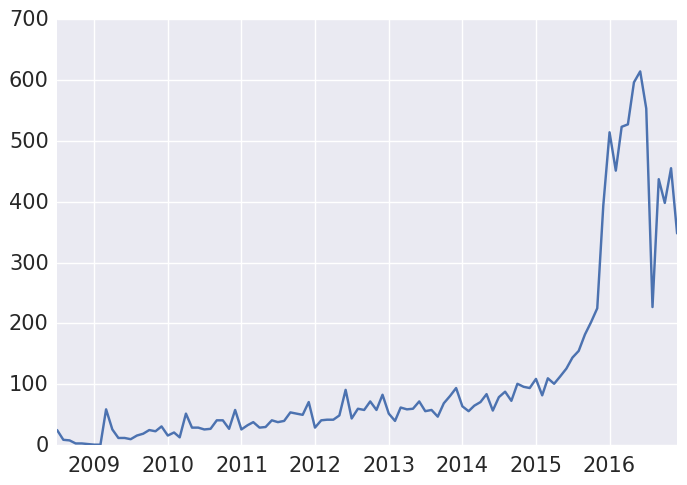

In [22]:
count_by_month.release_date = count_by_month.release_month.apply(lambda x: x+'-01')
count_by_month.index=pd.to_datetime(count_by_month.release_date,format='%Y-%m-%d')

plt.plot(count_by_month.index, count_by_month.id)

3) Now we do the same thing, this time aggregating on release_month as well as free_download, to investigate the trends of the number of applications being released as free download or otherwise.

In [23]:
count_by_month_a_free = itn_app.groupby(['release_month', 'free_download']).agg({'id':'count'})

In [24]:
count_by_month_a_free = count_by_month_a_free.reset_index()

In [25]:
count_by_month_a_free_f = count_by_month_a_free[count_by_month_a_free['free_download']=='f']
count_by_month_a_free_t = count_by_month_a_free[count_by_month_a_free['free_download']=='t']

In [26]:
count_by_month_a_free_t.release_date = count_by_month_a_free_t.release_month.apply(lambda x: x+'-01')
count_by_month_a_free_t.index=pd.to_datetime(count_by_month_a_free_t.release_date,format='%Y-%m-%d')

# plt.plot(count_by_month_a_free_t.index, count_by_month_a_free_t.id)

In [27]:
count_by_month_a_free_f.release_date = count_by_month_a_free_f.release_month.apply(lambda x: x+'-01')
count_by_month_a_free_f.index=pd.to_datetime(count_by_month_a_free_f.release_date,format='%Y-%m-%d')

# plt.plot(count_by_month_a_free_f.index, count_by_month_a_free_f.id)

The plots below show that for most parts in the time investigated, **free downloadable applications** still hold up the **majority** on the app market.

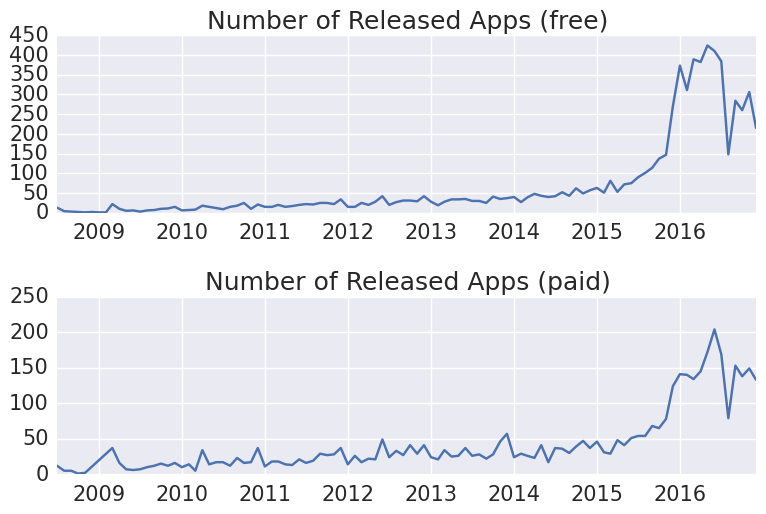

In [28]:
f, axarr = plt.subplots(2)
axarr[0].plot(count_by_month_a_free_t.index, count_by_month_a_free_t.id)
axarr[0].set_title('Number of Released Apps (free)')
axarr[1].plot(count_by_month_a_free_f.index, count_by_month_a_free_f.id)
axarr[1].set_title('Number of Released Apps (paid)')

plt.tight_layout()

# 4. Variable Impacts on the Rankings - free_download

In [29]:
ranks_joined = ranks.join(itn_app.set_index('id'), on='application_id')

In [30]:
ranks_joined

,created_at,application_id,rank,title,free_download,release_date,release_month,release_year
0,2016-01-01,479516143,1,Minecraft: Pocket Edition,f,2011-11-17,2011-11,2011
1,2016-01-01,490217893,2,iTunes U,t,2012-01-19,2012-01,2012
2,2016-01-01,868692227,3,Goat Simulator,f,2014-09-17,2014-09,2014
3,2016-01-01,1044677336,4,Cut the Rope: Magic,f,2015-12-16,2015-12,2015
4,2016-01-01,984732818,5,NBA 2K16,f,2015-10-14,2015-10,2015
5,2016-01-01,525818839,6,Plague Inc.,f,2012-05-25,2012-05,2012
6,2016-01-01,950812012,7,Alto's Adventure,f,2015-02-19,2015-02,2015
7,2016-01-01,951744068,8,Traffic Rider,t,2015-12-23,2015-12,2015
8,2016-01-01,1027688889,9,Piano Tiles 2™(Don't Tap The White Tile 2),t,2015-08-19,2015-08,2015
9,2016-01-01,946903436,10,I am Bread,f,2015-09-02,2015-09,2015


Now we investigate the effect of **free_download** on the rankings by doing the following experiment:

1) For the same ranking (e.g. rank = 1) throughout the whole year of 2016, we check what percentage are free applications and paid applications. We assume as the null hypothesis that the variable 'free_download' has no effect on 'rank'.<br>
2) If the null hypothesis stands, it will mean that all the applications, no matter whether they are free or not, have equal chance of being ranked at one position (e.g. rank = 1). It also means that throughout the year, all the applications have equal chance of being ranked at one position.<br>
3) Because free applications make up 62.3% of the population, it should hold that, with 95% of level of Confidence, the applications that satisfy free_download == 't' should hold one ranking with the following Confidence Interval (CI):

$$CI = \text{sample proportion} \pm z* \sqrt{\frac{\text{sample proportion}(1-\text{sample proportion})}{n}}$$

Here the sample proportion = 62.3%, n (sample size) = 366 (the number of days in a year), z = 1.96. Therefore CI = 

So it means that the applications with free_download == 't' should be around [57.3%, 67.3%] 95 times out of 100 experiment (if the null hypothesis holds).

Now let us see if the real life data from the dataset tells us the same story or not. First take the example of rank == 1 (top applications throughout the year):

In [31]:
rank_to_observe = 1
ranks_joined_sample = ranks_joined[ranks_joined['rank']==rank_to_observe]

count_by_rank_free_perc = ranks_joined_sample.groupby('free_download').agg({'application_id':'count'})
count_free_t_sample = count_by_rank_free_perc['application_id'][1]
count_by_rank_free_perc_sample = count_free_t_sample/366.0
count_by_rank_free_perc_sample

0.051912568306010931

Also take a glimpse at the sample ranking table (rank == 1):

In [32]:
ranks_joined_sample

,created_at,application_id,rank,title,free_download,release_date,release_month,release_year
0,2016-01-01,479516143,1,Minecraft: Pocket Edition,f,2011-11-17,2011-11,2011
1000,2016-01-02,479516143,1,Minecraft: Pocket Edition,f,2011-11-17,2011-11,2011
2000,2016-01-03,479516143,1,Minecraft: Pocket Edition,f,2011-11-17,2011-11,2011
3000,2016-01-04,479516143,1,Minecraft: Pocket Edition,f,2011-11-17,2011-11,2011
4000,2016-01-05,479516143,1,Minecraft: Pocket Edition,f,2011-11-17,2011-11,2011
5000,2016-01-06,479516143,1,Minecraft: Pocket Edition,f,2011-11-17,2011-11,2011
6000,2016-01-07,479516143,1,Minecraft: Pocket Edition,f,2011-11-17,2011-11,2011
7000,2016-01-08,479516143,1,Minecraft: Pocket Edition,f,2011-11-17,2011-11,2011
8000,2016-01-09,479516143,1,Minecraft: Pocket Edition,f,2011-11-17,2011-11,2011
9000,2016-01-10,479516143,1,Minecraft: Pocket Edition,f,2011-11-17,2011-11,2011


Looks like Minecraft Pocket Edition (paid, not free) has been ranked as No.1 for the most part of the year.

In [33]:
count_by_rank_free_perc

,application_id
free_download,
f,347
t,19


This table above and the percentage which was shown before (count_by_rank_free_perc_sample = 0.0519) indicates that **the null hypothesis (free_download has no effect on the ranking) is wrong** in the case of rank == 1, because 5.19% is well below the Confidence Interval of [57.3%, 67.3%].

**This means, at least for now in the case of rank == 1, whether or not an application is free has a huge impact on its ranking.**

Now we do the same experiment for ranking from 1 to 1000, and check how it goes: <br>
* tmp_impact == 1 means positive impact,
* tmp_impact == -1 means negative impact,
* tmp_impact == 0 means no visible impact:

In [34]:
if_free_download_impact = []
for i in range(1, 1001):
    tmp_impact = 0
    rank_to_observe = i
    ranks_joined_sample = ranks_joined[ranks_joined['rank']==rank_to_observe]

    count_by_rank_free_perc = ranks_joined_sample.groupby('free_download').agg({'application_id':'count'})
    count_free_t_sample = count_by_rank_free_perc['application_id'][1]
    count_by_rank_free_perc_sample = count_free_t_sample/366.0
    if (count_by_rank_free_perc_sample > 0.673):
        tmp_impact = 1
    elif (count_by_rank_free_perc_sample < 0.573):
        tmp_impact = -1
    else:
        tmp_impact = 0
    if_free_download_impact.append(tmp_impact)

In [35]:
len(if_free_download_impact)

1000

In [36]:
sum(if_free_download_impact)

-968

The result above means that the variable **free_download** has a **extremely strong negative impact** on the ranking of an application. At least for the top 1000 apps, the **paid apps** are ranked **much better than the free apps**.

This can also be shown by looking at the percentage of free vs paid apps for the whole ranking year of 2016:

In [37]:
ranks_joined.groupby('free_download').agg({'application_id':'count'})

,application_id
free_download,
f,194736
t,171264


The table above tells us that even though the paid apps account for only 37.7% of the apps in the dataset, they actually are ranked much better than the free apps, as they are appearing more on the top 1000 list in the year of 2016 (well above the Confidence Interval).

# 5. Variable Impacts on the Rankings - release_year

Now we take a look at the impact of **release_year** on the rankings (later on, if need be, the same can also be done for release_month. Now however, to make the visualization clearer, we look at the variable on a yearly detail level). 

Firstly, we look at the general impact of release year on the ranking (by inspecting the median ranking of apps per release year for the whole year of 2016):

In [38]:
count_ranks_by_release_year = ranks_joined.groupby('release_year').agg({'application_id':'count', 'rank':'median'})

count_ranks_by_release_year

,application_id,rank
release_year,,
2008,6187,256
2009,18985,315
2010,24612,470
2011,33325,476
2012,37544,467
2013,50975,488
2014,48011,516
2015,75439,564
2016,70922,547


In [39]:
count_ranks_by_release_year = count_ranks_by_release_year.reset_index()

/usr/lib/pymodules/python2.7/matplotlib/axes.py:4747: UserWarning: No labeled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labeled objects found. "


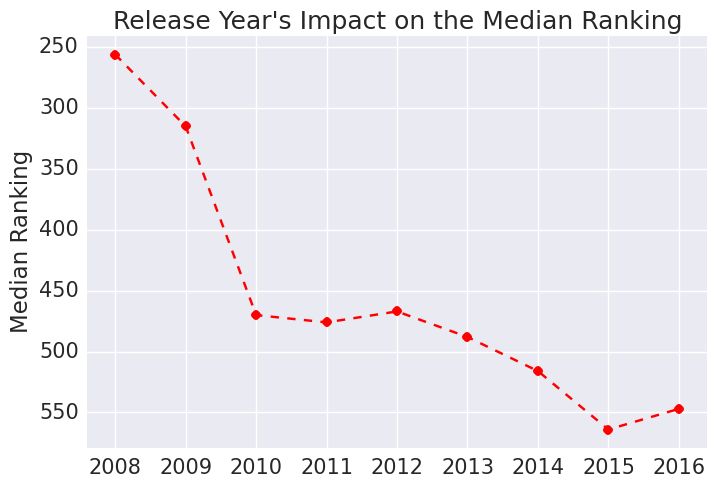

In [40]:
l_release_years = list(count_ranks_by_release_year['release_year'].astype(int))
plt.xticks(l_release_years, l_release_years, rotation='horizontal')

plt.plot(l_release_years, list(count_ranks_by_release_year['rank']), marker='o', linestyle='--', color='r')
# plt.xlabel('Release Year')
plt.ylabel('Median Ranking')
plt.title('Release Year\'s Impact on the Median Ranking')
plt.legend()
plt.gca().invert_yaxis()
plt.margins(0.05)
plt.subplots_adjust(bottom=0.15)
plt.show()

The graph above shows that, generally speaking, **older apps have a better ranking than the younger apps**.

Secondly, we plot the development (in year 2016) of **average (median) rankings** for each release_year cohort group:

In [41]:
count_ranks_development = ranks_joined.groupby(['created_at', 'release_year']).agg({'application_id':'count', 'rank':'median'})

In [42]:
count_ranks_development = count_ranks_development.reset_index()

In [43]:
count_ranks_development.head()

,created_at,release_year,application_id,rank
0,2016-01-01,2008,13,235.0
1,2016-01-01,2009,39,274.0
2,2016-01-01,2010,65,526.0
3,2016-01-01,2011,107,619.0
4,2016-01-01,2012,112,482.5


In [44]:
count_ranks_development.created_at=pd.to_datetime(count_ranks_development.created_at,format='%Y-%m-%d')

In [45]:
l_release_years = count_ranks_development.release_year.unique()

In [46]:
l_release_years

array(['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016'], dtype=object)

In [47]:
import matplotlib.pyplot as plt
def subplot_ranking_development(l_release_years, count_ranks_development):
    colormap = plt.cm.gist_ncar
    plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9, len(l_release_years))])
    for release_year_current in l_release_years:
        count_ranks_current = count_ranks_development[count_ranks_development['release_year']==release_year_current]
        l_created_at = count_ranks_current.created_at

        plt.plot(count_ranks_current.created_at, count_ranks_current['rank'])
    plt.gca().invert_yaxis()
    plt.margins(0.05)
    plt.title('Ranking development (median) in 2016 per Release Year', y=1.08)
    plt.legend(l_release_years, ncol=4, loc='upper center', 
               bbox_to_anchor=[0.5, 1.1], 
               columnspacing=1.0, labelspacing=0.0,
               handletextpad=0.0, handlelength=1.5,
               fancybox=True, shadow=True)

    plt.tight_layout()

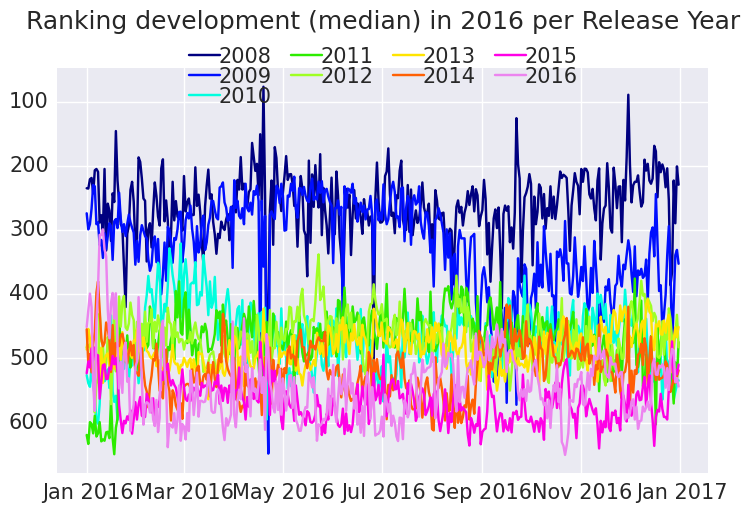

In [48]:
subplot_ranking_development(l_release_years, count_ranks_development)

As the trend plot above looks very messy, we put the individual lines in smaller plot groups:

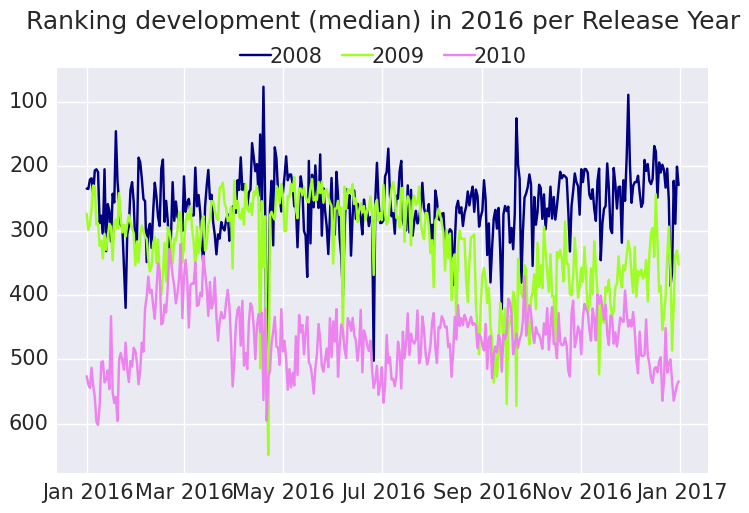

In [49]:
sub_l_release_years = l_release_years[:3]

subplot_ranking_development(sub_l_release_years, count_ranks_development)

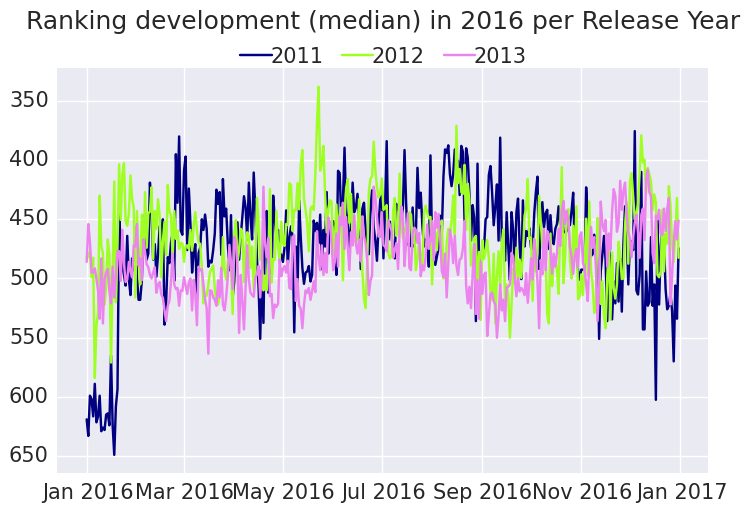

In [50]:
sub_l_release_years = l_release_years[3:6]

subplot_ranking_development(sub_l_release_years, count_ranks_development)

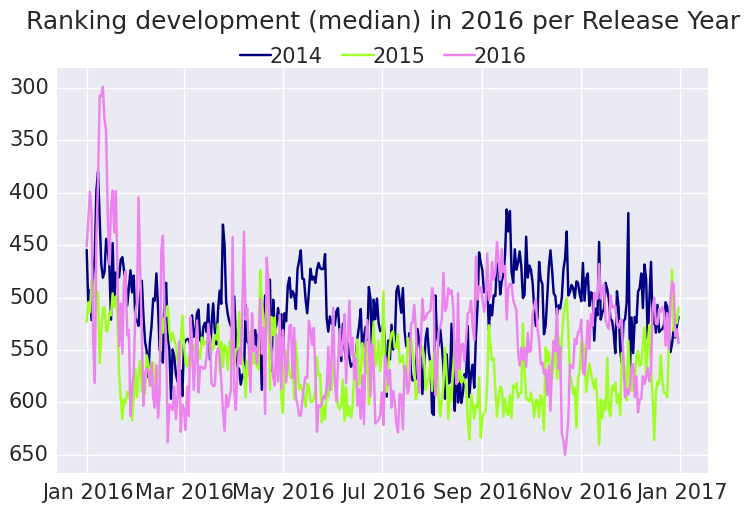

In [51]:
sub_l_release_years = l_release_years[6:9]

subplot_ranking_development(sub_l_release_years, count_ranks_development)

After closely examining the three subplots, we see for each individual release_year cohort group, the ranking generally fluctuates around its base value **without any distinguishable up or down trend** (at least for the year of 2016).

But the subplots give us a clear visualization of the impact of release year on the ranking (median) in a general sense: **older apps have a better ranking than the younger apps**.

# 6. Prediction - rank

In this section, we will build models to predict the future ranking for individual applications. The split ratio among training/testing parts is 80/20. This split ratio will give the model 292 observations for training, 74 observations for testing, which guarantees that the model will have enough sample data to learn the basic patterns from the time series. The definition of the models as well as the codes for the training/testing processes can be found in the following .py files:

* lstm_train.py (the main .py file, which includes the model definition and training steps)
* utils.py (including several utility functions, like data loading)

Here for the task of ranking prediction, **LSTM** is chosen as the prediction model, as it doesn't need special hyperparameter adjustment like in the case of ARIMA models and therefore can be used for all the individual applications separately without losing predictive performance. Also, another reason LSTM is picked instead of ARIMA or other linear models is that LSTM can detect long term sequential information, whereas ARIMA, due to its assumption, is not capable of learning complicated non-linear patterns.

The prediction performance for a couple of example applications(ID = 951744068 and 504575083) are depicted in the following graphs:

<img src="lstm_ranking_prediction_result_951744068.png">

<img src="lstm_ranking_prediction_result_504575083.png">

From the graphs above we can see that the LSTM models have, for the most part (in spite of not being able to consider the spike cases most satisfactorily), **successfully managed** to learn the characteristics of the rank time series on an individual level.

# Notes:

Data Science is a means to an end. In this case, the end is data exploration, insight gaining and future prediction. Some future work that could be done on this dataset or with help of other outside data sources is:

1) Application classification/grouping based on Application Title + other potential features, which can be in turn used to analyze which types of apps are more popular etc.<br>
2) More extensive cohort analysis to identify the potential seasonality and other temporal trends in the dataset.<br>
3) Set up other prediction goals (e.g. number of applications in top 100/500/1000 for individual app cohorts).<br>
4) Feed in other features to examine their combined impact on the app rankings.
5) Feed in longer time series of ranking or other information into the LSTM or other prediction models, in order to learn the temporal sequences much more accurately.<br>
6) Integrate LSTM with Gaussian Process to build an even better prediction model (only after obtaining more and longer data to avoid overfitting).

If you have any questions regarding any detail on the analysis above, feel free to contact me per Skype (**jiacheng.yao07**) or per Email: [jc07.yao@gmail.com]()

Thank you very much for taking the time to review the notebook!